In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('ggplot')

/home/victor/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## IMPORT FILES

In [2]:
tweetsDF = pd.read_csv("Tweets.csv")

with open("lexicons/positive-words.txt") as file:
    positiveList = set(file.read().splitlines())
    
with open("lexicons/negative-words.txt") as file:
    negativeList = set(file.read().splitlines())

In [3]:
tweetsDF.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweetsDF.drop(labels=['tweet_id',
                      'name',
                      'retweet_count',
                      'tweet_coord',
                      'tweet_created',
                      'tweet_location', 
                      'user_timezone'], axis=1, inplace=True)

In [5]:
print("Porcentagem de dados nao nulos")
(len(tweetsDF)-tweetsDF.count())/len(tweetsDF)*100


Porcentagem de dados nao nulos


airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
negativereason_gold             99.781421
text                             0.000000
dtype: float64

Como as colunas 'airline_sentiment_gold' e 'negativereason_gold' estão praticamente inteiras com valores nulos, iremos deleta-las

In [6]:
tweetsDF.drop(labels=['airline_sentiment_gold',
                      'negativereason_gold'], axis=1,inplace=True)

In [7]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
text                            14640 non-null object
dtypes: float64(2), object(4)
memory usage: 686.3+ KB


---
Vamos preencher a coluna "negativereason_confidence" com dados da média

In [8]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

# transformed = imputer.fit_transform(tweetsDF["negativereason_confidence"])
negativeMean = tweetsDF["negativereason_confidence"].mean()
tweetsDF["negativereason_confidence"].fillna(negativeMean, inplace=True)
tweetsDF["negativereason"].fillna("Can't Tell", inplace=True)

In [9]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  14640 non-null object
negativereason_confidence       14640 non-null float64
airline                         14640 non-null object
text                            14640 non-null object
dtypes: float64(2), object(4)
memory usage: 686.3+ KB


In [10]:
## Distribuição de sentimentos
sentimentCounter = tweetsDF['airline_sentiment'].value_counts()
sentimentCounter

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<Container object of 3 artists>

([<matplotlib.axis.XTick at 0x7f6d4be12470>,
 <a list of 3 Text xticklabel objects>)

Text(0,0.5,'Mood Count')

Text(0.5,0,'Mood')

Text(0.5,1,'Count of Moods')

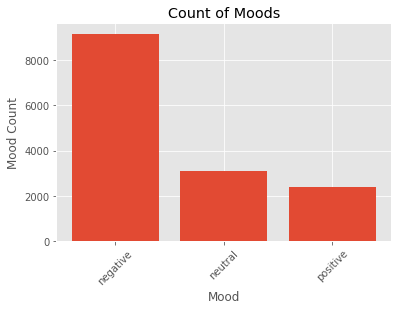

In [11]:
Index = [1,2,3]
plt.bar(Index,sentimentCounter)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

## Distribuição de tweets por companhia

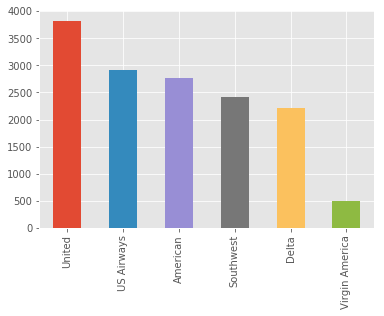

In [12]:
tweetsDF['airline'].value_counts().plot(kind='bar')

In [13]:
def plot_sub_sentiment(airline, tweet_df):
    df = tweet_df[tweet_df['airline']==airline]
    count = df['airline_sentiment'].value_counts()
    index = [1,2,3]
    plt.bar(index,count)
    plt.xticks(index,['negative','neutral','positive'])
    plt.ylabel('Frequencia')
    plt.xlabel('Sentimento')
    plt.title('Dist de sentimentos'+airline)
#     plt.ylim(0, len(tweet_df))
    plt.ylim(0, 3000)

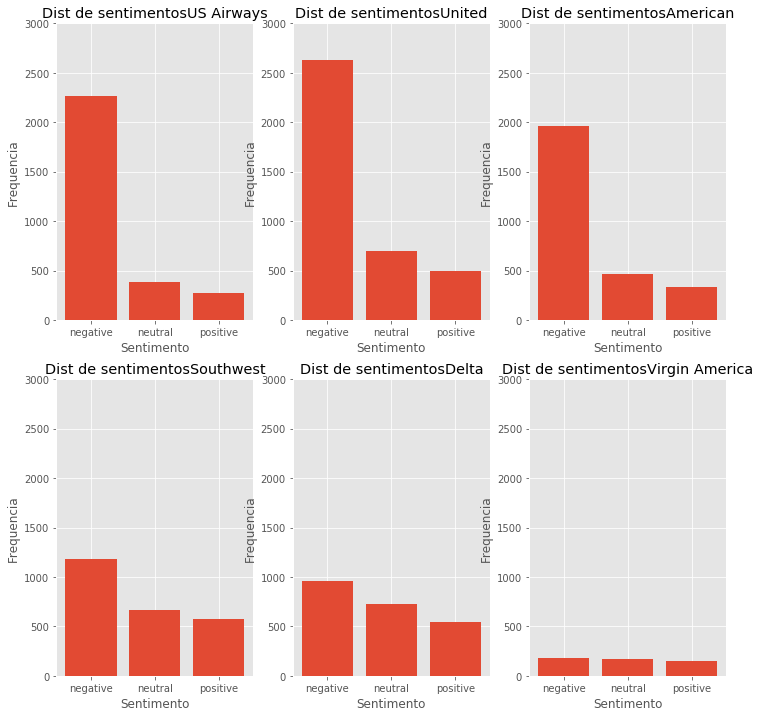

In [14]:
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways', tweetsDF)

plt.subplot(232)
plot_sub_sentiment('United', tweetsDF)

plt.subplot(233)
plot_sub_sentiment('American', tweetsDF)

plt.subplot(234)
plot_sub_sentiment('Southwest', tweetsDF)

plt.subplot(235)
plot_sub_sentiment('Delta', tweetsDF)

plt.subplot(236)
plot_sub_sentiment('Virgin America', tweetsDF)

---
## Motivos de reclamação
Vamos analisar a distribuição dos motivos de reclamacao

In [15]:
nrCounter = dict(tweetsDF['negativereason'].value_counts(sort=False))


In [16]:
def NR_Count(Airline, tweet_df):
    if Airline == 'All':
        df = tweet_df
    else:
        df = tweet_df[tweet_df['airline'] == Airline]
    
    count = dict(df['negativereason'].value_counts())
    Unique_reason = list(tweet_df['negativereason'].unique())
    Unique_reason = [x for x in Unique_reason if str(x) != 'nan']
    Reason_frame = pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count'] = Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline, tweet):
    df = NR_Count(Airline, tweet)
    count = df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

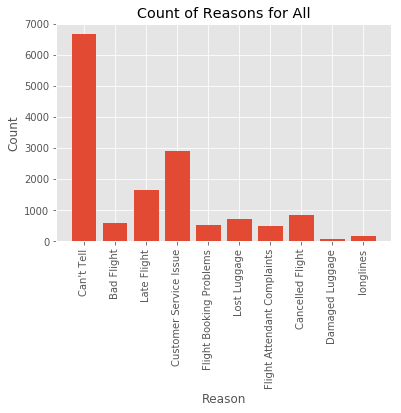

In [17]:
plot_reason('All', tweetsDF)

Reclamacoes sobre o servico ao cliente sao as mais frequentes, seguidas de atraso de voo. É interessante notar que mais de 1000 reclamacoes estao em categorias diversas.

## Motivos de reclamacoes por companhia
Vamos analisar as reclamacoes por cada companhia

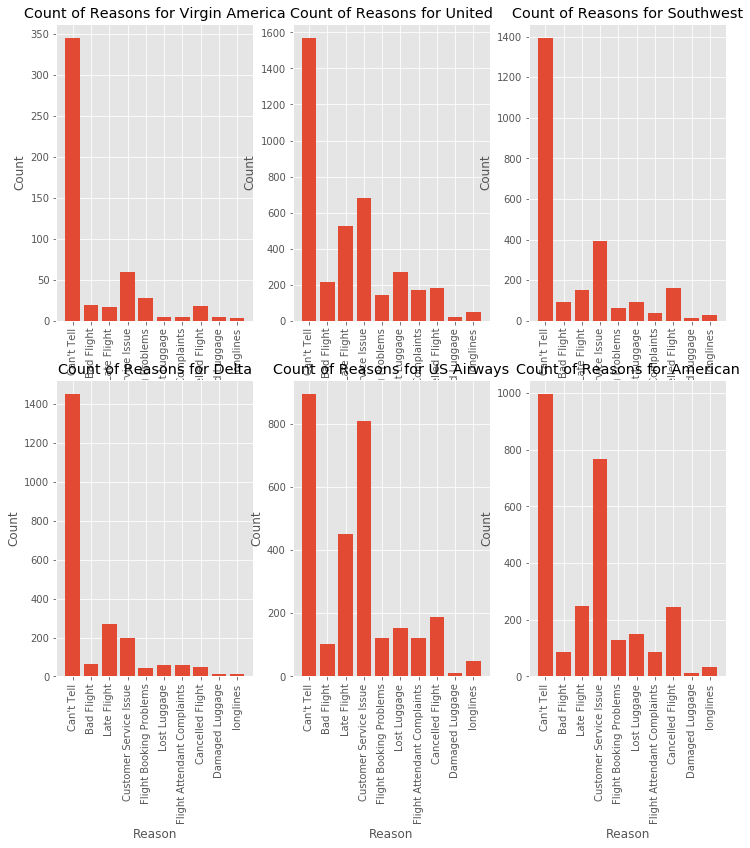

In [18]:
companies = list(tweetsDF["airline"].unique())
subPlot = 231
plt.figure(1,figsize=(12, 12))
for c in companies:
    plt.subplot(subPlot)
    plot_reason(c, tweetsDF)
    subPlot += 1

Em todas as companhias, a maior reclamacao é a do serviço ao cliente. Agora vamos plotar um wordcloud para ver quais as palavras mais frequentemente usadas. 

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
df = tweetsDF[tweetsDF["airline_sentiment"]=='negative']
words = ' '.join(df["text"])
cleanedWord = " ".join([w for w in words.split()
                            if "http" not in w
                            and not w.startswith("@")
                            and w != "RT"
                       ])

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleanedWord)

(-0.5, 2999.5, 2499.5, -0.5)

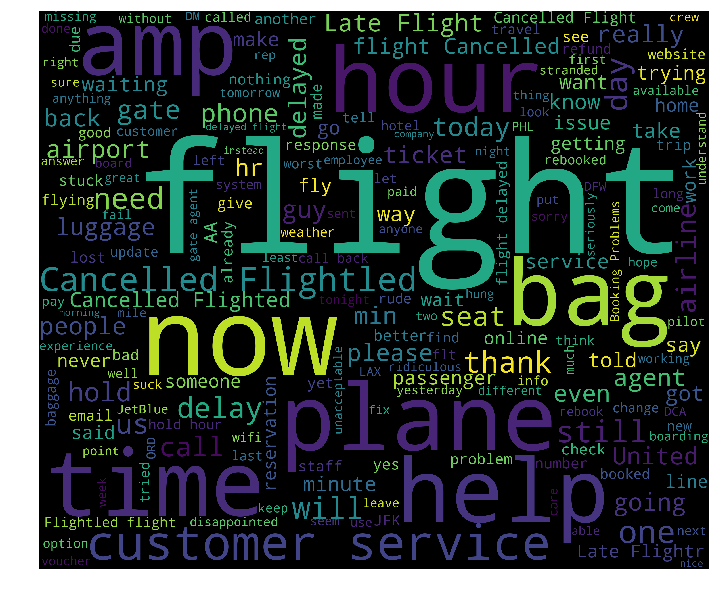

In [22]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Como as reclamacoes mais frequentes estao relacionadas ao servico ao consumidor e as palavras mais frequentes são "plane", "bag", "flight", podemos propor que a qualidade das aeronaves nao satisfaz os consumidores. Podem haver problemas com as bagagens de mao (espaço insuficiente, ou incovenientes). Além disso, a oferta de voos tambem pode ser um motivo de reclamacao

## Extração de características
Características basedas [neste](https://www.microsoft.com/en-us/research/wp-content/uploads/2015/03/main.pdf) trabalho serão utilizadas. Vale ressaltar que o autor extraiu 34 características. Nem todas elas serão extraídas aqui.

In [40]:
s= "Carr"
s[0].isupper()


True

In [46]:
# feature 3
def countPositiveCapitalised(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t[0].isupper() == True and t in positiveList:
            counter += 1
    return counter

# feature 4
def countNegativeCapitalised(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t[0].isupper() == True and t in negativeList:
            counter += 1
    return counter

# feature 5
def hasCapitalised(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t[0].isupper() == True:
            return 1
    return 0

# feature 6
def countHashtags(tokens):

    counter = 0
    for t in tokens:
        if t.startswith("#"):
            counter += 1
    return counter

# feature 7
def countPositive(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.lower() in positiveList:
            counter += 1
    return counter

# feature 8
def countNegative(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.lower() in negativeList:
            counter += 1
    return counter

# feature 9
def countNeutral(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.lower() in neutralList:
            counter += 1
    return counter

# feature 10
def countCapitalizedWords(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.isupper() and len(t) > 1:
            counter += 1
    return counter

# feature 11
def countSpecialCharacters(tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if not re.match("^[a-zA-Z0-9_]*$", t):
            counter += 1
    return counter

def countSpecificSpecialCharacter(specialCharacter, tokens):
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t == specialCharacter:
            counter += 1
    return counter


## Preprocessamento

Agora iremos preparar os tweets para servirem de input aos classificadores

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [25]:
tweetsDF.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
0,neutral,1.0000,Can't Tell,0.638298,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Can't Tell,0.000000,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Can't Tell,0.638298,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.703300,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.000000,Virgin America,@VirginAmerica and it's a really big bad thing...


In [26]:
def tweet2words(raw_tweet):
    callout_regex = "@[A-Za-z0-9_]+"
    #Remove mencoes a perfis
    letters_only = re.sub(callout_regex, " ", raw_tweet)
    letters_only = re.sub("[^a-zA-Z]", " ", letters_only)
    
    words = letters_only.lower().split()                             
    words = letters_only.split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [27]:
tweetsDF['sentiment'] = tweetsDF['airline_sentiment'].apply(lambda x: 0 if x=="negative" else 1)

In [28]:
tweetsDF['tweet2words'] = tweetsDF['text'].apply(tweet2words)

In [29]:
tweetsDF["num_capitalized"] = tweetsDF["tweet2words"].apply(countCapitalizedWords)

In [30]:
tweetsDF['tweet_length'] = tweetsDF['text'].apply(clean_tweet_length)

In [31]:
tweetsDF["num_negative_words"] = tweetsDF["tweet2words"].apply(countNegative)

In [32]:
train,test = train_test_split(tweetsDF,test_size=0.2,random_state=42)

In [33]:
train_clean_tweet=[]
for tweet in train['tweet2words']:
    train_clean_tweet.append(tweet)
    
test_clean_tweet=[]
for tweet in test['tweet2words']:
    test_clean_tweet.append(tweet)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [35]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    MLPClassifier(),
]

In [36]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

Accuracy=[]
Model=[]

for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5788934426229508
Accuracy of SVCis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.7575136612021858
Accuracy of RandomForestClassifieris 0.8169398907103825
Accuracy of AdaBoostClassifieris 0.7383879781420765
Accuracy of GaussianNBis 0.5703551912568307
Accuracy of MLPClassifieris 0.7776639344262295


<Container object of 8 artists>

([<matplotlib.axis.XTick at 0x7f6d398809e8>,
 <a list of 8 Text xticklabel objects>)

Text(0,0.5,'Acuracia')

Text(0.5,0,'Modelo')

Text(0.5,1,'Acuracia dos modelos')

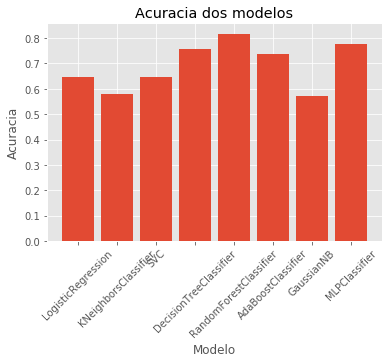

In [37]:
Index = [i for i in range(1, len(Model)+1)]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Acuracia')
plt.xlabel('Modelo')
plt.title('Acuracia dos modelos')